#  Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython as ip

import os
os.environ["OMP_NUM_THREADS"] = "1"
import sklearn.cluster as cl
import sklearn.metrics as mt
from sklearn.preprocessing import StandardScaler


# load Datasets

In [4]:
X = pd.read_csv('../datasets/dados_clusterizacao/X_dataset.csv')

In [5]:
X.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933


# K-Means

In [58]:
scaler = StandardScaler()
x = scaler.fit_transform(X)


results = {}
list_silhouette = []
list_k = []

for n_clusters in range(2, 10):

        
        model = cl.KMeans(n_clusters=n_clusters, random_state=42)
    
        labels = model.fit_predict(x)
    
        silhouette_avg = mt.silhouette_score(x, labels)

        list_silhouette.append(silhouette_avg)
        list_k.append(n_clusters)


kmeans_result = pd.DataFrame({'n_clusters': list_k,
                              'Silhouette Score': list_silhouette})

maximo = kmeans_result['Silhouette Score'].max()
result_fin = kmeans_result.loc[kmeans_result['Silhouette Score']==maximo,:].reset_index(drop = True)


# Affinity Propagation

In [47]:
scaler = StandardScaler()
x = scaler.fit_transform(X)


results = {}
list_silhouette = []
list_a= []

        
model = cl.AffinityPropagation(preference=-250)

labels = model.fit_predict(x)

silhouette_avg = mt.silhouette_score(x, labels)

list_silhouette.append(silhouette_avg)
list_a.append(len(set(labels)))

aff_result = pd.DataFrame({'n_clusters': list_a,
                              'Silhouette Score': list_silhouette})
aff_result


,n_clusters,Silhouette Score
0,3,0.280259


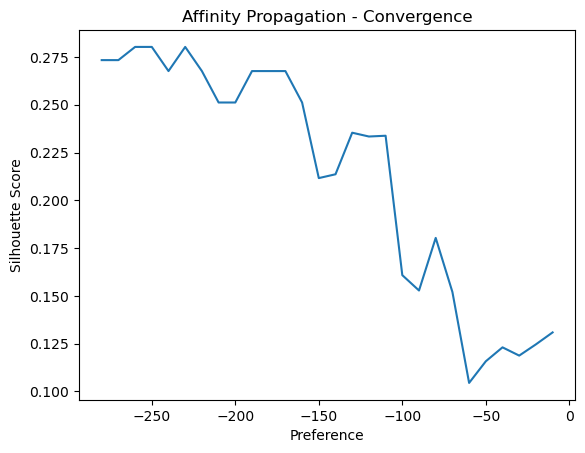

<Figure size 640x480 with 0 Axes>

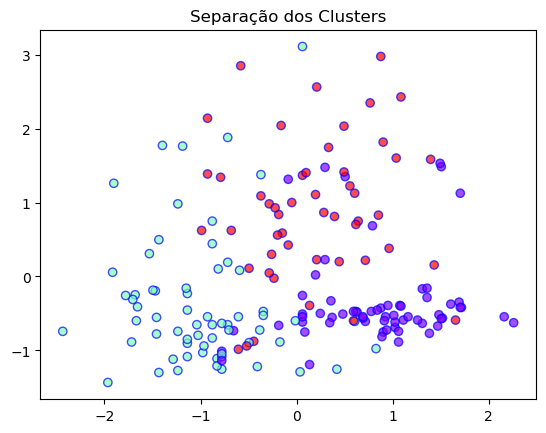

In [68]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

p = np.arange( -10, -300, -10 )
ss_list = []
fig = plt.figure()


for i in range( len( p ) ):
    model = cl.AffinityPropagation( preference=p[i] )
    labels = model.fit_predict( x )
    
    # Metric
    ss = mt.silhouette_score(x, labels)
    
    ss_list.append( ss )
    # Plot
    plt.plot( p[:i], ss_list[:i] )
    # Plot
    plt.title( 'Affinity Propagation - Convergence' );
    plt.xlabel( 'Preference' );
    plt.ylabel( 'Silhouette Score' )
    ip.display.clear_output(wait = True)
    plt.show()
    plt.gcf()
    # time.sleep(0.05)
    
# Showing final Clustering
max_index = ss_list.index( max( ss_list ) )
af = cl.AffinityPropagation( preference=p[max_index] )
clustering = af.fit(x)
fig = plt.figure()
plt.title( "Separação dos Clusters")
plt.scatter(x[:,0],
            x[:,1],
            c=clustering.labels_,
            cmap='rainbow',
            alpha=0.7,
            edgecolors='b');

# Resultado 

In [77]:
algoritmos = ['K-means', 'Affinity Propagation']
resultado = pd.concat([result_fin, aff_result], ignore_index = True)
resultado["Algoritmo"] = algoritmos
resultado = resultado.reindex(columns=['Algoritmo', 'n_clusters', 'Silhouette Score'])
resultado.head()

,Algoritmo,n_clusters,Silhouette Score
0,K-means,3,0.284859
1,Affinity Propagation,3,0.280259
